# Data Practice 2

## Short-term activity of of three spiders

Before proceding with this notebook, pleasse read carefully Chapter 1 of [Time Series Analysis book by George Box](https://wlu.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma991010340665504161&context=L&vid=01WLU_INST:01WLU&lang=en&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,%20Time%20series%20analysis&mode=Basic)

Open file **Practice 2_data1.csv** in MS. Excel. It should have has four columns (see image below). The first column list time (hours:minutes:seconds) and the 2-4 columns contains number of UV light crossing for the spider *s2, s4, and s6*. We will use this number of crossings as a measure of activity for a spider

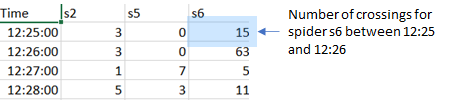

In [2]:
import pandas as pd

df = pd.read_csv('Practice 2_data1.csv')
display(df.head(10))

,Time,s2,s5,s6
0,12:25:00,3,0,15
1,12:26:00,3,0,63
2,12:27:00,1,7,5
3,12:28:00,5,3,11
4,12:29:00,0,0,0
5,12:30:00,13,2,0
6,12:31:00,10,9,0
7,12:32:00,42,0,0
8,12:33:00,6,0,0
9,12:34:00,26,4,0


## Experiment 1: Collecting statistics on spider activity

In the previous notebook you probably realize that it is hard to describe the difference between activity of different spiders. Your eye can see that traces are different, but it is hard to say why. In science, we are always try to use numbers and mathematical operation to **measure** the variables and describe the difference numerically. In this experiment we can make a better visualization of the activity and come up with set of numbers to compare the spiders. 

### Visually compare activity profiles for different spiders

Make a three separate subplots for three spiders arrange them either horizontal or vertically to optimally illustrate the difference or similarity between the activity patterns of different spiders. Adjust the axis to make such comparison faithful.

Text(0.5, 0.98, 'Spider Activity Over Time')

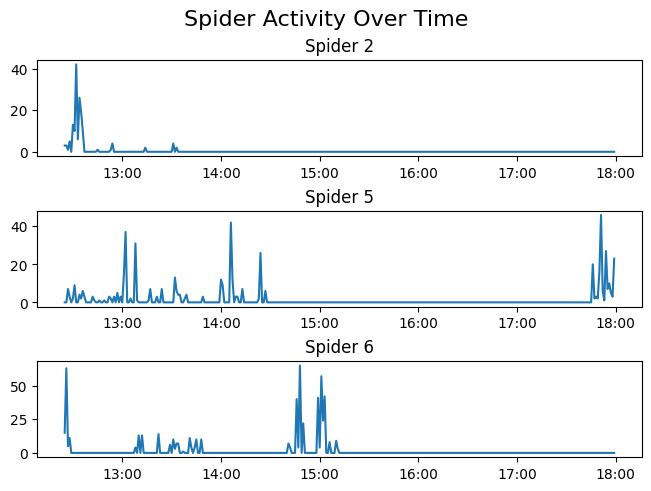

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from datetime import datetime

fig, axs = plt.subplots(3, 1, constrained_layout=True)

s2 = df["s2"]
s5 = df["s5"]
s6 = df["s6"]

times = [datetime.strptime(time, '%H:%M:%S') for time in df["Time"]]

axs[0].plot(times, s2)
axs[1].plot(times, s5)
axs[2].plot(times, s6)

axs[0].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
axs[1].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
axs[2].xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

axs[0].set_title("Spider 2")
axs[1].set_title("Spider 5")
axs[2].set_title("Spider 6")

fig.suptitle("Spider Activity Over Time", fontsize=16)

### Calculate statistics on spider activity

The simplest way to quantitatively capture individual's behavior is to compare a **mean** and **standard deviation** of each individual spider. Although, python numpy package can calculate it for you authomatically, it is useful to write your own user-definded fucntion to get an intuition for these common statistical measurmens.

### Write function for mean and standard deviation

Write a function which calculate a mean of python series. Test your function on array and list to make sure that it works

In [18]:
import numpy as np

def mean_of_series(series):
    mean_of_series = sum(series) / len(series)
    return(mean_of_series)

#Create a sample list and array to test your function
test_list  = [1,2,3,4]
test_array = np.array([1,2,3,4])

print(mean_of_series(test_list))
print(mean_of_series(test_array))

2.5
2.5


Make a function to calculate standard deviation of python series. If you not sure how standard deviation is calculated, check out this [Khan academy guidelines](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/calculating-standard-deviation-step-by-step). Test on list and array similar to the function for mean

In [42]:
def std_of_series(series):
    mean = mean_of_series(series)

    std_of_series = np.sqrt(sum((x - mean) ** 2 for x in series) / len(series))
    
    return(std_of_series)

test_list = [1, 2, 3, 2, 3, 1, 4, 5, 6, 7, 3, 2, 3, 2, 4, 1, 2, 2, 3, 4, 1, 1, 2, 3, 5, 7, -1, -2, 2, 3, 3, 3, 1, 2]

test_normal_array = np.random.normal(size=1000, scale=2)

print(std_of_series(test_list))
print(std_of_series(test_normal_array))


1.8924362284876957
2.0538094235362405


### Calculate mean and standard deviation for each spider.

Use your funciton to calculate mean and standard deviation for all spiders in our data frame. Test your calculations using numpy funciton for mean and standard deviation. Save the mean and standard deviation in a new data frame. Use example below as a template. Make sure to use loop for your data collection - your code shoudl work for a data file with any number of spiders

In [49]:
stats = []

for col_name in df.columns[1:]:
    series = df[col_name]

    mean = mean_of_series(series)
    std = std_of_series(series)
    stats += [[col_name, mean, std]]

stats_df = pd.DataFrame(data=stats, columns=["Spider", "Mean", "Standard Deviation"])

display(stats_df)

    

,Spider,Mean,Standard Deviation
0,s2,0.453731,3.101773
1,s5,1.465672,5.373610
2,s6,1.614925,7.419886


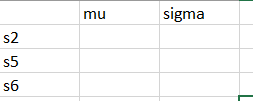

Do you think mean and standard deviation capture well the difference between the spiders?  

I think that they do capture some of the differences between the spiders - I can tell that spiders 5 and 6 are obviously much more active overall than 2 by looking at the table. It also seems like the standard deviation can capture some information about whether the spider has a greater range activity overall. For example, by looking at the table I can tell that although spiders 5 and 6 have similar mean activities, spider 6 has a greater range of activities (higher peaks).

However, there's some things that these statistics are missing, including anything to do with the time. For example, you could have two spiders with the exact same mean and standard deviation in activity, but one is active around 5:00 AM while the other is active around 5:00 PM. There is a clear difference in the two spiders, but the mean and standard deviation don't capture it.

## Experiment 2: Use moving average to understand trend in spider activity

Although basic statistcs capturing well overall changes, we are interested do see how spider activity changes over time.You probabaly noticed that the spiders has a sustained activity for a while and then remian silent. It would be essential for us to know when such activity period starts and ends. However, the minute-to-minute acitivity has a lot of randomisity. It would be great to see a long term trend, but get rid of short-term noise. Basically, we want to take a spider activity curve an smooth is out. There is a lot of different ways to denoise the time series, but probably the easiest is just aggregate data by longer period of time. Let's just try to calculate activity over longer periods of time

Write a funcion which take a time series of the spider and calculate average over every **n** minutes. Test your function by applying it to a first 20 min of spider **s2**. Average over, 2, 3, and 5 min. That is, you will have 2, 3, and 5 times less data. Print the average and original 20 min. Inspect visually to confirm that it works

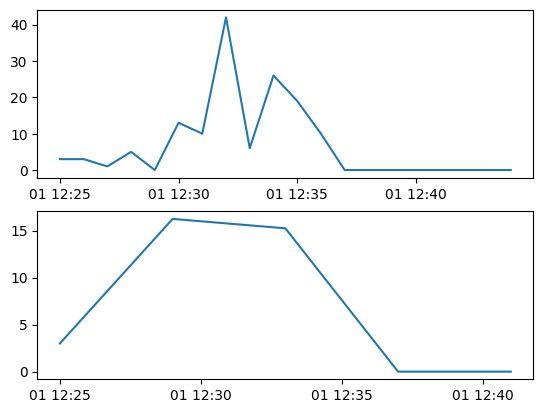

In [68]:
def aggregate_series(times, series, minutes):
    times_result = []
    result = []

    for n in range(0, len(series), minutes):
        times_result += [times[n]]
        result += [np.average(series[n:n+minutes])]

    return (times_result, result)

times_f20 = times[0:20]
s2_f20 = s2[0:20]

times_agg, s2_agg = aggregate_series(times_f20, s2_f20, 4)

fig, axs = plt.subplots(2, 1)

axs[0].plot(times_f20, s2_f20)

axs[1].plot(times_agg, s2_agg)

Apply your function to all spider in the dataset. Make another 3-subplot figure. In each plot original and aggregated spider plot. Do you think aggregated plot capture the spider behavior? Do you think it is easier compare aggregated plots?

You probably noticed that with approach above we lost a lot of data. To avoid such data loss, it is commond to use Another common approach to de-noising called **moving avearage**. In this approach, the average is calculated for each point moving either forward of backward. This way, only few points in the beginig or end is lost.Here is [some resources](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/moving-average/) on calculating moving average.

Make a function which take a series and calcualtes it's moving average. The first/or last points which cannot be calculation should be empty(use np.NaN to do so). Test your function by applying it to a first 20 min of spider **s2**. Average over, 2, 3, and 5 min.Print the average and original 20 min. Inspect visually to confirm that it works

Apply your function to all spider in the dataset. Make another 3-subplot figure. In each plot original and arolling average. Experiment with number of points you average out (this is usually referred as *rolling window*). Which rolling window give you the best de-noising?

## Experiment 3: Does light affect spider activity?

The file **'Practice 2_data1.csv'** contains example of several days of spider activity. It also has a column which has information about the light (0-dark, 1-light). Use rolling average to demonstrate activity of spiders in the data set and their responce to light. Do you think spiders respond to a light? Do you think the responce is similar/different among spiders. Make a visualizatio and some kind of quantitative measures to answer this question